In [ ]:
# garab  sobel and perwitt w sheel elmean w shuf lw el accuracy 3ely wla la
# decision tree
import os
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import cv2
from PIL import ImageEnhance
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid
import plotly.express as px
!pip install Pillow
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hashemradwan","key":"0ba53b9751b1a361f868534415f6a588"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download  'muratkokludataset/rice-image-dataset'

 94% 207M/219M [00:02<00:00, 69.2MB/s]
100% 219M/219M [00:02<00:00, 90.7MB/s]


In [ ]:
! unzip 'rice-image-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

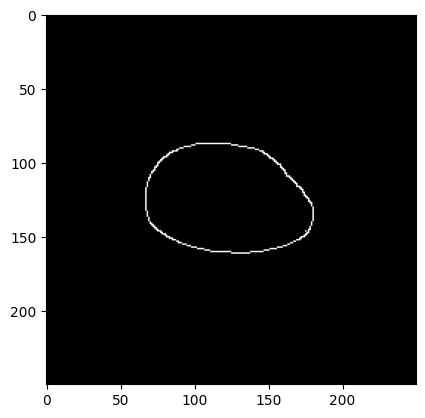

In [ ]:
from PIL import Image, ImageFilter
from mpl_toolkits.axes_grid1 import ImageGrid

img = cv2.imread('/content/Rice_Image_Dataset/Karacadag/Karacadag (9000).jpg', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 100, 200)


plt.imshow(edges, cmap='gray')

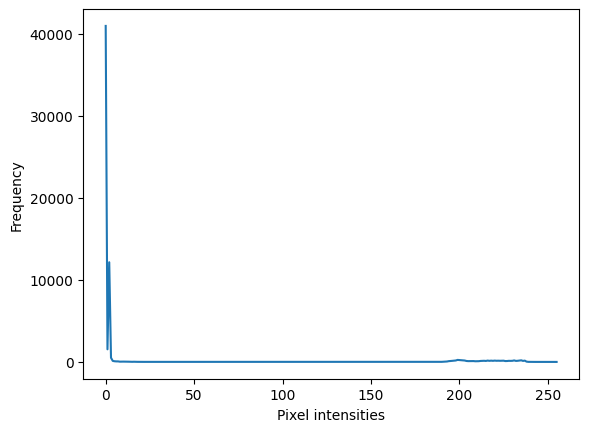

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img = plt.imread('/content/Rice_Image_Dataset/Karacadag/Karacadag (9000).jpg')

# Convert the image to grayscale
gray_img = np.mean(img, axis=2)

# Calculate the histogram of the grayscale image
hist = np.histogram(gray_img, bins=256, range=(0, 256))[0]

# Plot the histogram
plt.plot(hist)
plt.xlabel('Pixel intensities')
plt.ylabel('Frequency')
plt.show()

<ipython-input-9-09a0c1c205a1>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,4),plt.imshow(img_sobel,cmap = 'gray')


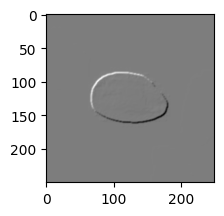

In [ ]:
from PIL import Image, ImageFilter
from mpl_toolkits.axes_grid1 import ImageGrid

img = cv2.imread('/content/Rice_Image_Dataset/Karacadag/Karacadag (9000).jpg', cv2.IMREAD_GRAYSCALE)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y
img_sobel = sobelx + sobely

plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(img_sobel,cmap = 'gray')



plt.show()

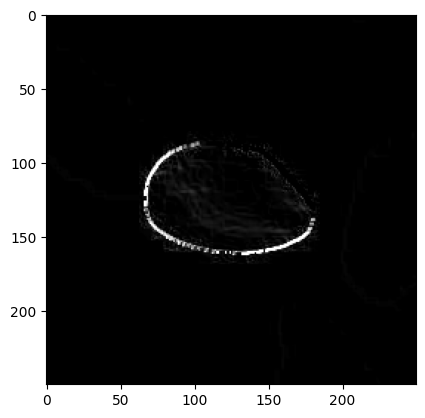

In [ ]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img, -1, kernelx)
img_prewitty = cv2.filter2D(img, -1, kernely)

plt.imshow( img_prewittx + img_prewitty, cmap='gray')

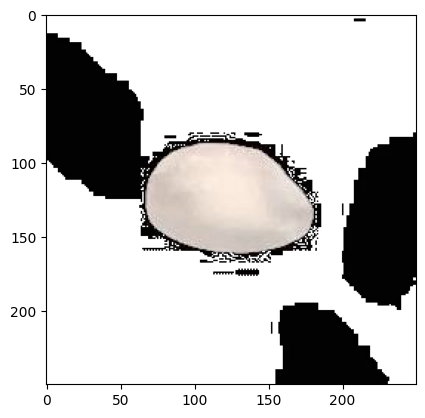

In [ ]:
from PIL import Image, ImageFilter
from mpl_toolkits.axes_grid1 import ImageGrid
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import sobel
src = cv2.imread('/content/Rice_Image_Dataset/Karacadag/Karacadag (9000).jpg')

tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, alpha = cv2.threshold(tmp, 0, 255, cv2.THRESH_BINARY)

# Using cv2.split() to split channels
# of coloured image
b, g, r = cv2.split(src)

# Making list of Red, Green, Blue
# Channels and alpha
rgba = [b, g, r, alpha]

# Using cv2.merge() to merge rgba
# into a coloured/multi-channeled image
dst = cv2.merge(rgba, 4)

# Writing and saving to a new image
cv2.imwrite("gfg_white.png", dst)
plt.imshow(dst, cmap='gray')

In [ ]:

labels =os.listdir("/content/Rice_Image_Dataset")
labels.remove('Rice_Citation_Request.txt')
def extract_features(image):

    image = cv2.convertScaleAbs(image)
    mean = cv2.mean(image)
    median = cv2.medianBlur(image, 3)

    # Compute the histogram of the image as feature
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    feature2 = hist.flatten()
    #3rd feature
    edges = cv2.Canny(image, 100, 200)

    # Flatten the 2D edge image into a 1D array of edge pixel values
    features = edges.flatten()


    return np.concatenate([mean ,feature2, features])

x=[]
y=[]
# Extract features from the images in the dataset
for i in labels:
    folder_path=os.path.join('/content/Rice_Image_Dataset',i)
    counter=0
    for j in os.listdir(folder_path):
        counter+=1
        img = cv2.imread(os.path.join(folder_path,j))
        features = extract_features(img)
        x.append(features)
        y.append(labels.index(i))
        if counter==150:break
#convert to array
x = np.array(x)
#normalize array
x = x/255
y = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)




In [ ]:
"""
labels =os.listdir("/content/Rice_Image_Dataset")
labels.remove('Rice_Citation_Request.txt')
def extract_features(image):

    image = cv2.convertScaleAbs(image)
    sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)  # x
    sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)  # y
    img_sobel = sobelx + sobely
    sobel = img_sobel.flatten()
    median = cv2.medianBlur(image, 3)

    # Compute the histogram of the image as feature
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    feature2 = hist.flatten()
    #3rd feature
    edges = cv2.Canny(image, 100, 200)

    # Flatten the 2D edge image into a 1D array of edge pixel values
    features = edges.flatten()


    return np.concatenate([sobel ,feature2, features])

x=[]
y=[]
# Extract features from the images in the dataset
for i in labels:
    folder_path=os.path.join('/content/Rice_Image_Dataset',i)
    counter=0
    for j in os.listdir(folder_path):
        counter+=1
        img = cv2.imread(os.path.join(folder_path,j))
        features = extract_features(img)
        x.append(features)
        y.append(labels.index(i))
        if counter==200:break
#convert to array
x = np.array(x)
#normalize array
x = x/255
y = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create an SVM classifier and fit the training data
clf = SVC(kernel='rbf', C=11.8, gamma='auto')
clf.fit(x_train, y_train)

# Predict the labels for the testing data
y_pred = clf.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# accuracy given is 0.17
"""

'\nlabels =os.listdir("/content/Rice_Image_Dataset")\nlabels.remove(\'Rice_Citation_Request.txt\')\ndef extract_features(image):\n   \n    image = cv2.convertScaleAbs(image)\n    sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)  # x\n    sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)  # y\n    img_sobel = sobelx + sobely\n    sobel = img_sobel.flatten()\n    median = cv2.medianBlur(image, 3)\n\n    # Compute the histogram of the image as feature\n    hist = cv2.calcHist([image], [0], None, [256], [0, 256])\n    feature2 = hist.flatten()\n    #3rd feature\n    edges = cv2.Canny(image, 100, 200)\n\n    # Flatten the 2D edge image into a 1D array of edge pixel values\n    features = edges.flatten()\n\n\n    return np.concatenate([sobel ,feature2, features])\n\nx=[]\ny=[]\n# Extract features from the images in the dataset\nfor i in labels:\n    folder_path=os.path.join(\'/content/Rice_Image_Dataset\',i)\n    counter=0 \n    for j in os.listdir(folder_path):\n        counter+=1 \n        

Accuracy: 0.7133333333333334


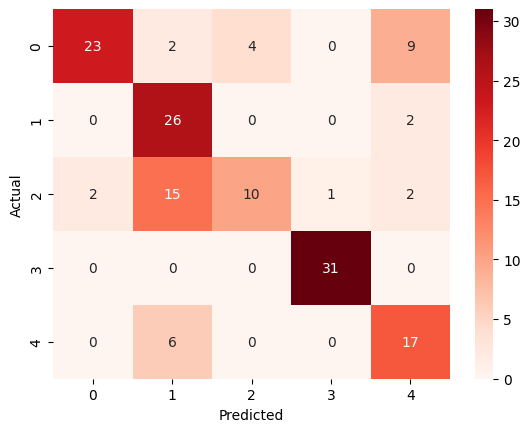

In [ ]:
# Create an SVM classifier and fit the training data

clf = SVC(kernel='rbf', C=11.8, gamma='auto')
clf.fit(x_train, y_train)

# Predict the labels for the testing data
y_pred = clf.predict(x_test)

y_pred_SVC= clf.decision_function(x_test)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#Fitting Decision Tree classifier to the training set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)
#Predicting the test set result
y_pred= classifier.predict(x_test)
#Creating the Confusion matrix

from sklearn.metrics import confusion_matrix

accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        30
           1       0.80      0.77      0.79        31
           2       0.74      0.83      0.78        30
           3       1.00      1.00      1.00        28
           4       0.83      0.77      0.80        31

    accuracy                           0.83       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.83      0.83       150



In [ ]:
#Fitting Decision Tree classifier to the training set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import  RandomForestClassifier

classifier_forest= RandomForestClassifier(criterion='gini', random_state=0)
classifier_forest.fit(x_train, y_train)
#Predicting the test set result
y_pred_rf= classifier_forest.predict(x_test)


from sklearn.metrics import confusion_matrix

accuracy_score(y_pred_rf,y_test)
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        41
           1       0.72      0.90      0.80        29
           2       0.87      0.85      0.86        40
           3       0.86      0.95      0.90        38
           4       0.89      0.78      0.83        40

    accuracy                           0.85       188
   macro avg       0.85      0.85      0.85       188
weighted avg       0.86      0.85      0.85       188



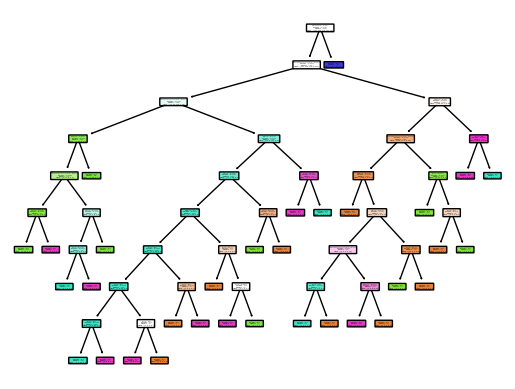

In [ ]:
from sklearn.tree import plot_tree
dec_tree = plot_tree(decision_tree=classifier, feature_names = features, class_names = labels , filled = True , precision = 4, rounded = True)



**ensemble classification**




**voting**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
model1 = DecisionTreeClassifier()

model2 = KNeighborsClassifier()

model3= LogisticRegression()

model4 = GaussianNB()

model5 = MultinomialNB()

model1.fit(x_train,y_train)

model2.fit(x_train,y_train)

model3.fit(x_train,y_train)

model4.fit(x_train,y_train)

model5.fit(x_train,y_train)

pred1=model1.predict(x_test)

pred2=model2.predict(x_test)

pred3=model3.predict(x_test)

pred4=model4.predict(x_test)

pred5=model5.predict(x_test)

final_pred = np.array([])


model = VotingClassifier([('knn',model2),('lr',model3),('Mn',model5),('Gn',model4),('dt',model1)
]
)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression()),
                             ('Mn', MultinomialNB()), ('Gn', GaussianNB()),
                             ('dt', DecisionTreeClassifier())])

In [ ]:
model.score(x_train,y_train)*100


100.0

In [ ]:
model.score(x_test,y_pred)*100

86.66666666666667

**Boosting**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=4 ,random_state=0)
abc.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=4, random_state=0)

In [ ]:
y_pred=abc.predict(x_test)

In [ ]:
abc.score(x_test,y_test)

0.6266666666666667

In [ ]:
accuracy_score(y_test,y_pred)

0.6266666666666667

ROC and AUC


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)
y_pred= model_lr.decision_function(x_test)
y_pred_lr = model_lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC and AUC scores for each class:
Class 0: ROC AUC = 0.95
Class 1: ROC AUC = 0.84
Class 2: ROC AUC = 0.92
Class 3: ROC AUC = 0.93
Class 4: ROC AUC = 0.94

Micro-average ROC and AUC:
ROC AUC = 0.92


array([[34,  2,  0,  0,  0],
       [ 6, 26,  1,  2,  1],
       [ 0,  0, 33,  0,  6],
       [ 0,  2,  0, 37,  3],
       [ 0,  1,  1,  0, 33]])

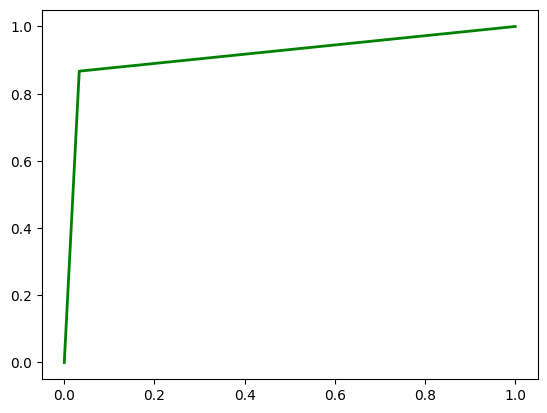

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc


plt.figure(0).clf()
# Convert multiclass labels to binary labels
lb = LabelBinarizer()
lb.fit(y_test)
lb.fit(y_pred_lr)
y_test_binary = lb.transform(y_test)
y_pred_lr_binary = lb.transform(y_pred_lr)

# Compute ROC curve and AUC for each class
fprr = dict()
tprr = dict()
roc_aucc = dict()
for i in range(0,5):
    fprr[i], tprr[i], _ = roc_curve(y_test_binary[:, i], y_pred_lr_binary[:, i])
    roc_aucc[i] = auc(fprr[i], tprr[i])

# Compute micro-average ROC curve and AUC
fprr["micro"], tprr["micro"], _ = roc_curve(y_test_binary.ravel(), y_pred_lr_binary.ravel())
roc_aucc["micro"] = auc(fprr["micro"], tprr["micro"])



print("ROC and AUC scores for each class:")
for i in range(0,5):
    print("Class {}: ROC AUC = {:.2f}".format(i, roc_aucc[i]))

print("\nMicro-average ROC and AUC:")
print("ROC AUC = {:.2f}".format(roc_aucc["micro"]))



plt.plot(
    fprr["micro"],
    tprr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_aucc['micro']:.2f})",
    color="green",
    linestyle="-",
    linewidth=2,
)
confusion_matrix(y_test,y_pred_lr)

ROC and AUC scores for each class:
Class 0: ROC AUC = 0.93
Class 1: ROC AUC = 0.85
Class 2: ROC AUC = 0.92
Class 3: ROC AUC = 0.92
Class 4: ROC AUC = 0.91

Micro-average ROC and AUC:
ROC AUC = 0.91


array([[33,  2,  0,  1,  0],
       [ 6, 26,  1,  1,  2],
       [ 2,  1, 34,  0,  2],
       [ 0,  0,  1, 36,  5],
       [ 0,  0,  4,  0, 31]])

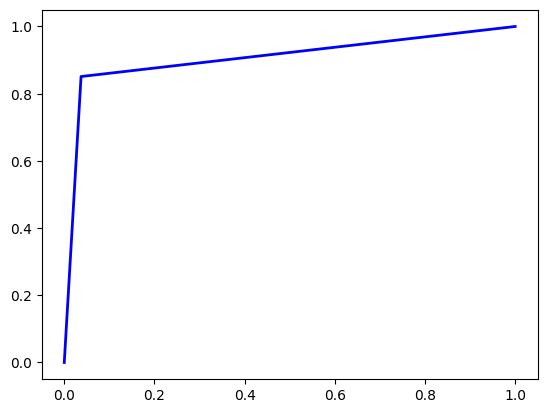

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

# Convert multiclass labels to binary labels
lb = LabelBinarizer()
lb.fit(y_test)
lb.fit(y_pred_rf)
y_test_binary = lb.transform(y_test)
y_pred_rf_binary = lb.transform(y_pred_rf)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(0,5):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_rf_binary[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary.ravel(), y_pred_rf_binary.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

fpr["macro"], tpr["macro"], _ = roc_curve(y_test_binary.ravel(), y_pred_rf_binary.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print("ROC and AUC scores for each class:")
for i in range(0,5):
    print("Class {}: ROC AUC = {:.2f}".format(i, roc_auc[i]))

print("\nMicro-average ROC and AUC:")
print("ROC AUC = {:.2f}".format(roc_auc["micro"]))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="blue",
    linestyle="-",
    linewidth=2,
)

confusion_matrix(y_test,y_pred_rf)

Text(0.5, 1.0, 'Comparison between Linear regression and random forest classifiers')

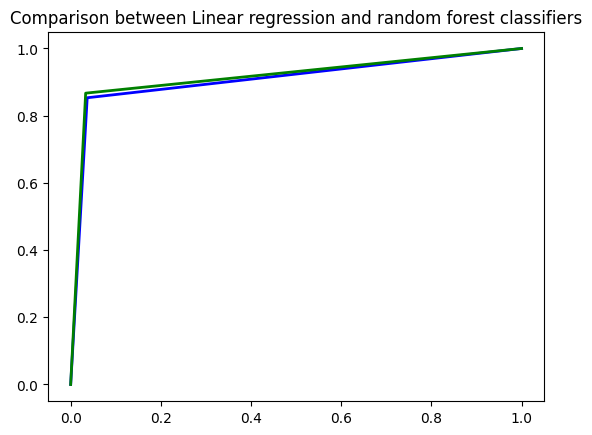

In [ ]:
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="blue",
    linestyle="-",
    linewidth=2,
)
plt.plot(
    fprr["micro"],
    tprr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_aucc['micro']:.2f})",
    color="green",
    linestyle="-",
    linewidth=2,
)
plt.title("Comparison between Linear regression and random forest classifiers")


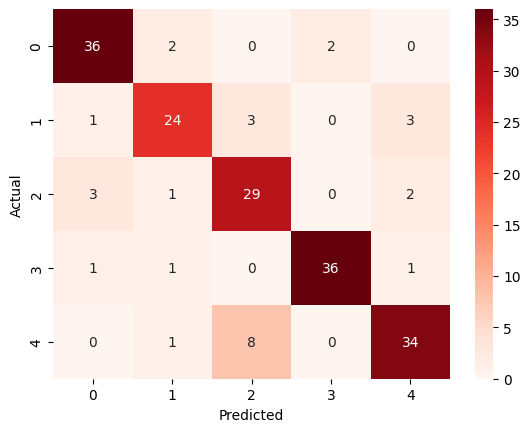

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix=confusion_matrix(y_pred_lr,y_pred_rf)
sns.heatmap(conf_matrix, annot=True, cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()